<a href="https://colab.research.google.com/github/wubeshetA/ML/blob/main/supervised_learning/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

## **Linear Regression with One Variable**

The following is the very basic implementation of Linear regression with one variable.

## **Notes**

The goal of Linear regression model is to find a line (find w and b) that fits the data points best. This line is define by $$f_{w,b}(x) = wx + b \tag{1}$$

In linear regression, we utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$

To minimize the cost function (to find the best fitting line), gradient descent algorithm says:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [10]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Training data
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])


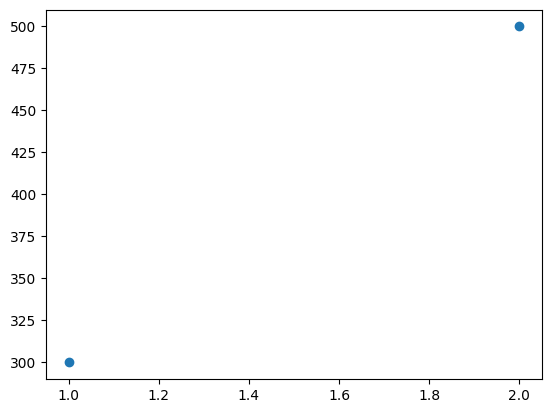

In [28]:
# raw data visualization
plt.scatter(x_train, y_train)
plt.show()

**Compute cost**

In [42]:
def cost(x_train, y_train, w, b):
  # cost function
  # here is the formula for cost (error):  mean square error
  """
  f_wb = w*x_train[i] + b
  MSE(mean squared error) = (∑((f_wb - y[i]) ** 2))/2*m = cost
  """
  m = len(x_train)
  total_error = 0
  for i in range(m):
    # calculate the total error
    f_wb = w*x_train[i] + b
    total_error += (f_wb - y_train[i])**2

  # average error (cost)
  avg_cost = total_error/(2*m)
  return avg_cost

  $$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

In [34]:
def gradient(x_train, y_train,w, b):
  m = len(x_train)
  dJ_w = 0
  dJ_b = 0
  for i in range(m):
    # calculate the total error
    f_wb = w*x_train[i] + b
    dJ_w += ((f_wb - y_train[i])*x_train[i])
    dJ_b += ((f_wb - y_train[i]))
  # average error (cost)
  dJ_w = dJ_w / m
  dJ_b = dJ_b / m
  return (dJ_w, dJ_b)

In [46]:
# Find optimized W and B
def find_best_fiting(x_train, y_train, init_w, init_b, alpha, iteration):

  w = init_w
  b = init_b


  for i in range(iteration):
    if i < 100 or (i >= 10_000 and i % 10_000 == 0):
      print(f"{i}th, w: {w}, b: {b}, cost: {cost(x_train, y_train, w, b)}")
    dJ_w, dJ_b = gradient(x_train, y_train, w, b)
    w = w - alpha * dJ_w
    b = b - alpha * dJ_b
  return (w, b)


In [48]:
alpha = 10**-2
iteration = 100_000
init_w = 190
init_b = 95

w, b = find_best_fiting(x_train, y_train, init_w, init_b, alpha, iteration)


0th, w: 190, b: 95, cost: 212.5
1th, w: 190.325, b: 95.2, cost: 198.1870312500006
2th, w: 190.63887499999998, b: 95.393125, cost: 184.83827431640677
3th, w: 190.94200625, b: 95.579610625, cost: 172.38877357908018
4th, w: 191.234761934375, b: 95.759684425, cost: 160.77794925402466
5th, w: 191.51749761964064, b: 95.93356615173438, cost: 149.94930260839342
6th, w: 191.7905566868736, b: 96.10146802592243, cost: 139.85014103414832
7th, w: 192.05427074931293, b: 96.2635949953601, cost: 130.43132164255016
8th, w: 192.30896005564972, b: 96.4201449841668, cost: 121.64701213181644
9th, w: 192.55493387949596, b: 96.57130913349039, cost: 113.45446776428787
10th, w: 192.7924908955062, b: 96.71727203396304, cost: 105.81382336788351
11th, w: 193.0219195426091, b: 96.85821195019082, cost: 98.68789934969416
12th, w: 193.24349837479102, b: 96.99430103754977, cost: 92.04202077777781
13th, w: 193.457496399858, b: 97.12570555155241, cost: 85.84384865078194
14th, w: 193.66417340658828, b: 97.25258605003901,